<a href="https://colab.research.google.com/github/JeffersonNery/MVP_Analise_de_Dados/blob/main/MVP_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP ANÁLISE DE DADOS - Dados climatológicos das estações automáticas do INMET**
## **1 - INTRODUÇÃO**

O Instituto Nacional de Meteorologia INMET é um orgão do Ministério da Agricultura e Pecuária e tem como missão agregar valor à produção no Brasil por meio de informações meteorológicas. Esta missão é alcançada por meio de monitoramento, análise e previsão de tempo e de clima, que se fundamentam em pesquisa aplicada, trabalho em parceria e compartilhamento do conhecimento, com ênfase em resultados práticos e confiáveis. O Sistema de Coleta e Distribuição de Dados Meteorológicos do Instituto (temperatura, umidade relativa do ar, direção e velocidade do vento, pressão atmosférica, precipitação, entre outras variáveis) é dotado de estações de sondagem de ar superior (radiossonda); estações meteorológicas de superfície, operadas manualmente; e a maior rede de estações automáticas da América do Sul.

A rede de estações meteorológicas automáticas utiliza o que há de mais moderno internacionalmente. Os dados coletados por essa rede são disseminados, de forma democrática e gratuita, em tempo real, na página https://portal.inmet.gov.br, e têm aplicação em todos os setores da economia, de modo especial no agropecuário e em apoio à Defesa Civil.

## **2 - OBJETIVO**

Este MVP tem como objetivo a análise dos dados climatológicos referente as estações automáticas do INMET presentes em todo o território nacional visando responder as seguintes questões:

*   Qual a quantidade total de estações meteorológicas por situação?
*   Como estão distribuídas as estações meteorológicas por estado?
*   Qual o estado que possui o maior e menor número de estações meteorológicas?
*   Qual a estação que está operante por mais tempo?
*   Quais as 5 estações que possuem a maior média de temperatura?
*   Quais as 5 estações que possuem a menor média de temperatura?
*   Quais foram os 5 dias que registraram a maior precipitação em 24 horas?
*   Quais as 5 cidades que tiveram a maior precipitação acumulada em 1 mês?

## **3 - COLETA DOS DADOS**

**3.1 - EXTRAÇÃO DAS INFORMAÇÕES**

Para a extração das informações foram utilizadas duas fontes do INMET para obter os dataset's deste MVP:

*   FONTE 01: https://bdmep.inmet.gov.br/ (base de dados das estações meteorológicas)
*   FONTE 02: https://portal.inmet.gov.br/paginas/catalogoaut (catálogo das estações automáticas)

Este processo é simples onde você seleciona quais informações você precisa, cadastra seu e-mail onde você vai receber um link de confirmação de solicitação e após confirmar a solicitação você vai receber outro link para efetuar o download da base de dados em formato CSV (Comma-separated values - valores separados por vírgula).

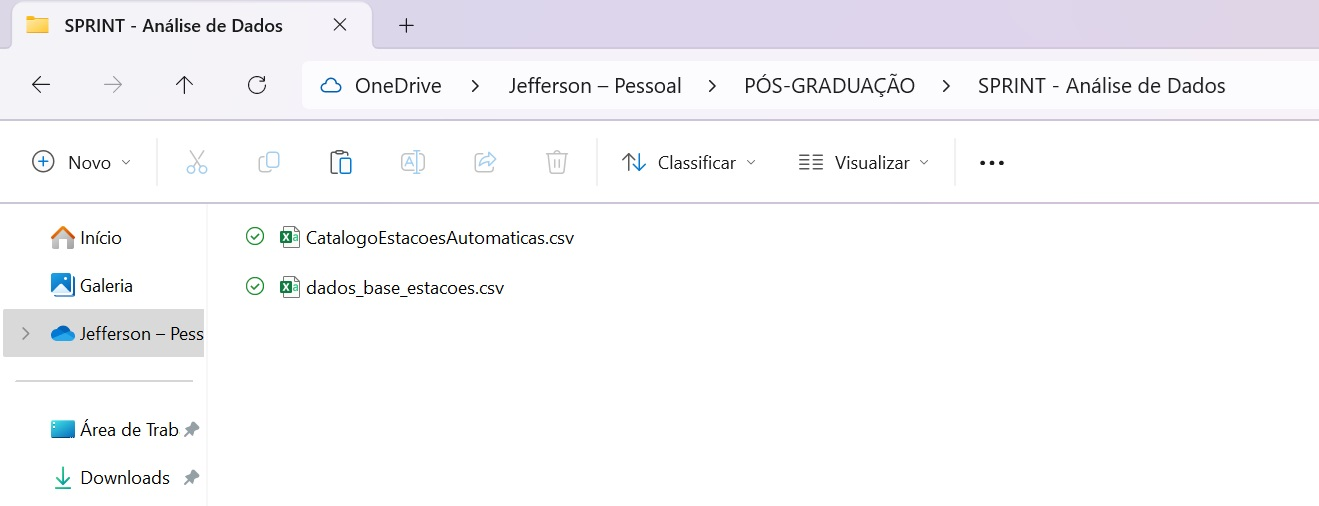

## **4 - CARGA DOS DATASET's**

Foi criado um diretório no Github https://github.com/JeffersonNery/MVP_Analise_de_Dados onde foram armazenados os dois dataset's. A base de dados CatalogoEstacoesAutomaticas.csv foi feito upload via browser, e a base dados_base_estacoes.csv devido ao seu tamanho ser maior que 100mb tive que utilizar o Git Large File Storage (Git LFS), onde especifiquei o arquivo e fiz o commit atráves do terminal.

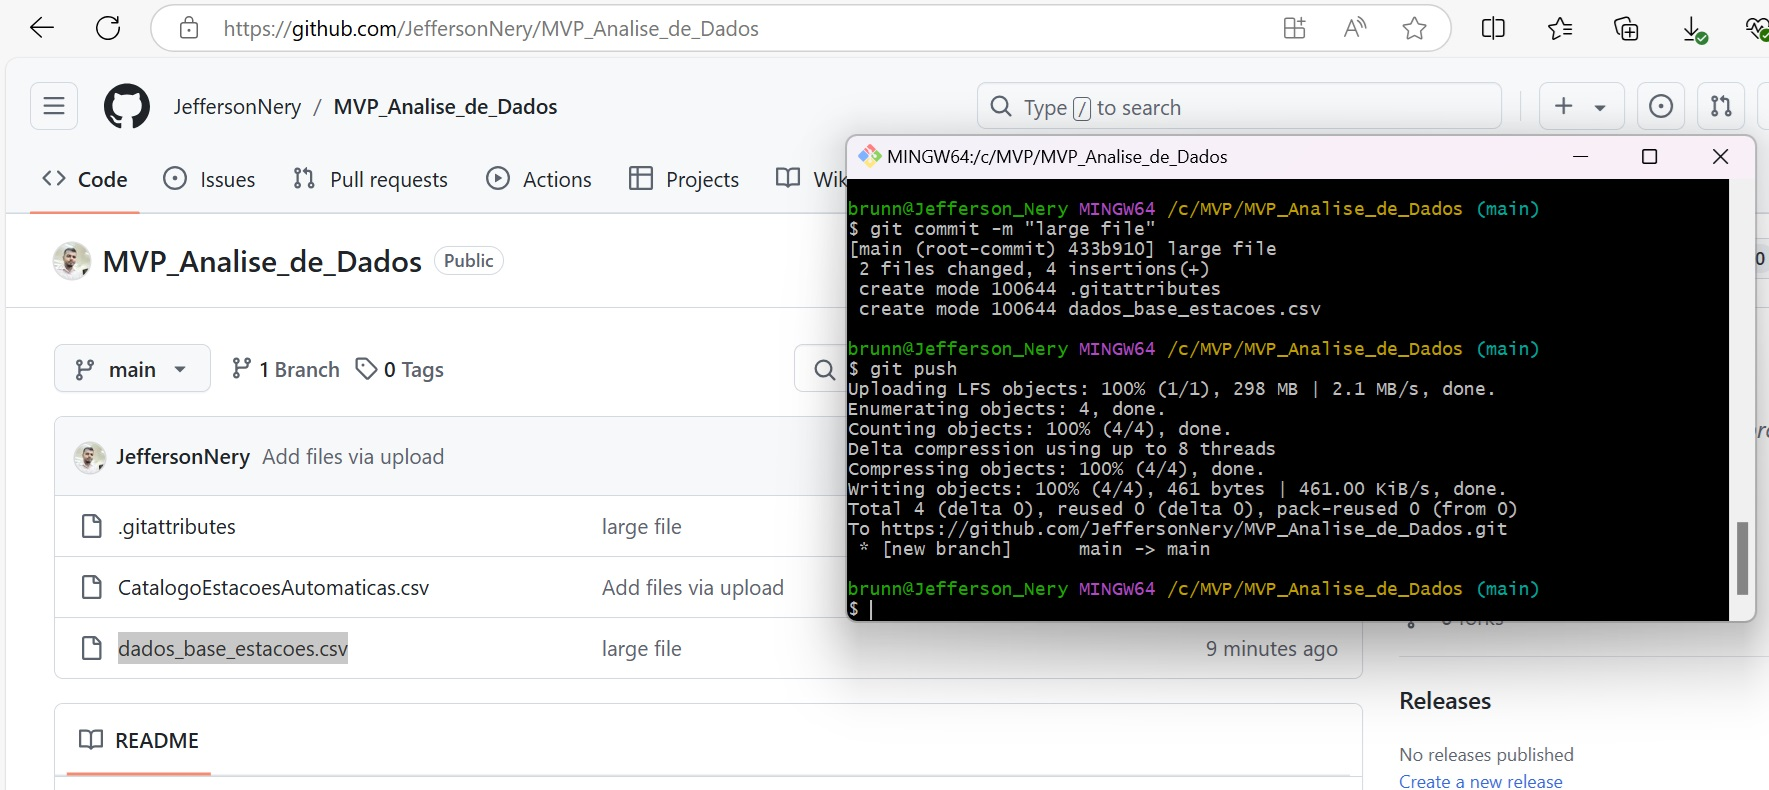

**4.1 - DESCRIÇÃO DAS COLUNAS DO DATASET_1 "CatalogoEstacoesAutomaticas.csv":**

* 0 - DC_NOME
* 1 - SG_ESTADO
* 2 - CD_SITUACAO
* 3 - VL_LATITUDE
* 4 - VL_LONGITUDE
* 5 - VL_ALTITUDE
* 6 - DT_INICIO_OPERACAO
* 7 - CD_ESTACAO

**4.2 - DESCRIÇÃO DAS COLUNAS DO DATASET_2 "dados_base_estacoes.csv":**

* 0 - cod. estacao
* 1 - Data Medicao
* 2 - PRECIPITACAO TOTAL, DIARIO (AUT)(mm)
* 3 - PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)
* 4 - TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)
* 5 - TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)
* 6 - TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)
* 7 - TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)
* 8 - UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)
* 9 - UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)
* 10 - VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)
* 11 - VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)

## **5 - IMPORTAÇÃO DOS DATASET's**

Nesta etapa iremos realizar o carregamento dos nossos dataset's que foram anteriormente armazenados no repositório do github.

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Importando os dataset's através da url no Github

url_dataset_1 = 'https://raw.githubusercontent.com/JeffersonNery/MVP_Analise_de_Dados/refs/heads/main/CatalogoEstacoesAutomaticas.csv'
url_dataset_2 = 'https://media.githubusercontent.com/media/JeffersonNery/MVP_Analise_de_Dados/refs/heads/main/dados_base_estacoes.csv'

In [3]:
# Carga dos dataset's através do arquivo csv

maindf1=pd.read_csv(url_dataset_1)
maindf2=pd.read_csv(url_dataset_2)

<ipython-input-3-4ee199dbb237>:4: DtypeWarning: Columns (2,3,4,5,6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  maindf2=pd.read_csv(url_dataset_2)


Aviso de DtypeWarging - o dataset_2 que contém os dados das estações possui dados mistos em algumas colunas, o que pode causar problemas de desempenho ou erros ao manipular os dados. Para resolver isso vamor definir low_memory=False para que o arquivo csv possa ser processado todo de uma vez ao invés de carrega-ló em pedaços menores.

In [4]:
# Definindo low_memory para a carga do dataset_2

maindf2 = pd.read_csv(url_dataset_2, low_memory=False)

## **6 - VISUALIZAÇÃO E PREPARAÇÃO DOS DADOS**

Vamos verificar como estão os dados dos dataset's e prepara-lós para a próxima etapa de análise dos dados.

In [5]:
# Verificando as informações do dataset_1

maindf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DC_NOME             565 non-null    object 
 1   SG_ESTADO           565 non-null    object 
 2   CD_SITUACAO         565 non-null    object 
 3   VL_LATITUDE         565 non-null    float64
 4   VL_LONGITUDE        565 non-null    float64
 5   VL_ALTITUDE         565 non-null    float64
 6   DT_INICIO_OPERACAO  565 non-null    object 
 7   CD_ESTACAO          565 non-null    object 
dtypes: float64(3), object(5)
memory usage: 35.4+ KB


In [6]:
# Visualizando o número de colunas e linhas do dataset_1

maindf1.shape

(565, 8)

In [7]:
# Visualizando as 5 primeiras linhas do dataset_1

maindf1.head()

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
0,ABROLHOS,BA,Pane,-17.963056,-38.703333,20.93,7/20/2008,A422
1,ACARAU,CE,Pane,-3.121111,-40.087222,67.15,4/21/2009,A360
2,AFONSO CLAUDIO,ES,Operante,-20.104167,-41.106944,507.48,9/23/2011,A657
3,AGUA BOA,MT,Operante,-14.016389,-52.211667,440.00,12/15/2006,A908
4,AGUA CLARA,MS,Operante,-20.444444,-52.875833,323.63,8/13/2010,A756


In [8]:
# Visualizando as 5 últimas linhas do dataset_1

maindf1.tail()

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
560,VITORIA,ES,Operante,-20.270833,-40.305833,9.00,10/30/2006,A612
561,VITORIA DA CONQUISTA,BA,Operante,-14.886389,-40.801389,879.38,5/31/2007,A414
562,XANXERE,SC,Operante,-26.938666,-52.398090,878.74,3/14/2008,A858
563,XINGUARA,PA,Operante,-7.110556,-49.926111,245.00,9/10/2016,A247
564,ZE DOCA,MA,Operante,-3.269167,-45.651111,45.50,9/17/2019,A255


In [9]:
# Visualizando se existem valores nulos ou inválidos do dataset_1

print('Valores nulos: ', maindf1.isnull().values.sum())
print('Valores NA: ',maindf1.isnull().values.any())

Valores nulos:  0
Valores NA:  False


In [10]:
# Verificando as informações do dataset_2

maindf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091119 entries, 0 to 3091118
Data columns (total 12 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   cod. estacao                                            object 
 1   Data Medicao                                            object 
 2   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    object 
 3   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              object 
 4   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  object 
 5   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    object 
 6   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     object 
 7   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    object 
 8   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           object 
 9   UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)          float64
 10  VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                

In [11]:
# Visualizando o número de colunas e linhas do dataset_2

maindf2.shape

(3091119, 12)

In [12]:
# Visualizando as 5 primeiras linhas do dataset_2

maindf2.head()

,cod. estacao,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,A028,29/06/2013,0,NaN,NaN,"31,6","23,579167","16,1","61,125",NaN,NaN,NaN
1,A028,30/06/2013,0,NaN,NaN,"31,9","23,3625","15,3","60,416667",NaN,NaN,NaN
2,A028,01/07/2013,0,NaN,NaN,"31,6","22,954167","14,4","53,25",NaN,NaN,NaN
3,A028,02/07/2013,0,NaN,NaN,"29,5","22,566667","17,7","61,125",NaN,NaN,NaN
4,A028,03/07/2013,0,NaN,NaN,31,"22,9","15,5",58,NaN,NaN,NaN


In [13]:
# Visualizando as 5 últimas linhas do dataset_2

maindf2.tail()

,cod. estacao,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
3091114,A758,07/08/2022,3,NaN,"17,456522","24,1","21,378261","18,8","78,782609",53.0,"7,7","0,917391"
3091115,A758,08/08/2022,"6,2",NaN,"17,791667","21,7","20,05","18,5","86,791667",84.0,"6,8","1,254167"
3091116,A758,09/08/2022,3,NaN,"13,575","19,3","15,816667","14,8","86,708333",79.0,"8,4","1,770833"
3091117,A758,10/08/2022,"0,8",NaN,"8,313043","17,8","12,769565","8,4","74,869565",63.0,"10,1","1,465217"
3091118,A758,11/08/2022,NaN,NaN,"8,059091","24,6","15,136364","6,5","65,090909",40.0,7,"1,145455"


In [14]:
# Visualizando se existem valores nulos ou inválidos do dataset_2

print('Valores nulos: ', maindf1.isnull().values.sum())
print('Valores NA: ',maindf1.isnull().values.any())

Valores nulos:  0
Valores NA:  False


## **7 - ANÁLISE DOS DADOS**

Nesta etapa vamos iniciar a análise dos dados presentes em nossos dataset's com o intuito de responder as perguntas descritas no item 2 - Objetivo.

**7.1 - Qual a quantidade total de estações meteorológicas?**

In [15]:
# Contando o o número de estações por situação
situacao_counts = maindf1['CD_SITUACAO'].value_counts()

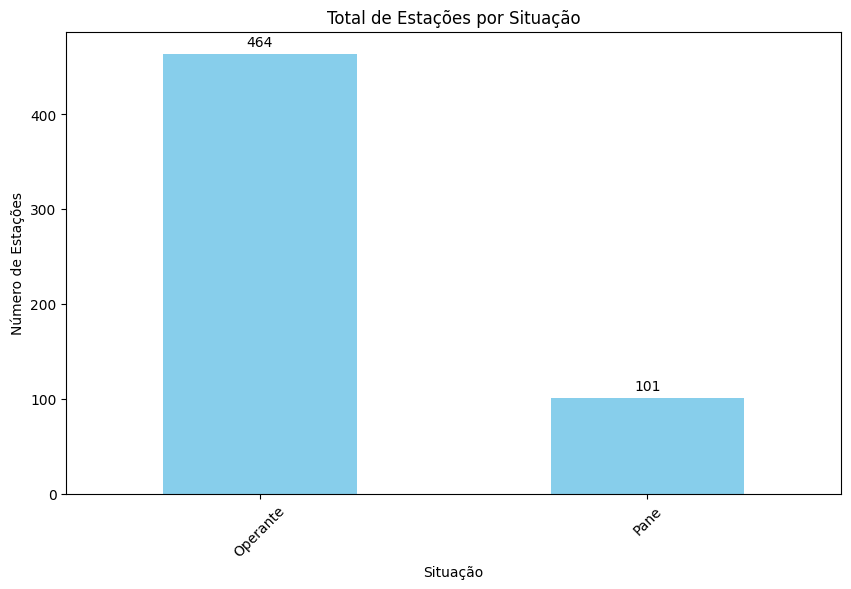

In [16]:
# Criando o gráfico de barras com o total de estações por situação.

plt.figure(figsize=(10, 6))
bars = situacao_counts.plot(kind='bar', color='skyblue')
plt.title('Total de Estações por Situação')
plt.xlabel('Situação')
plt.ylabel('Número de Estações')
plt.xticks(rotation=45)

# Adicionando o rótulos nas barras do gráfico
for bar in bars.containers[0]:
    bars.annotate(f'{bar.get_height()}',
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.show()

O gráfico acima demonstra que do total de 565 estações meteorológicas temos 464 (82%) "Operantes", ou seja ativas e 101 (18%) com o status "Pane", ou seja inoperantes.

**7.2 - Como estão distribuídas as estações meteorológicas por estado?**

**7.3 - Qual o estado que possui o maior e menor número de estações meteorológicas?**


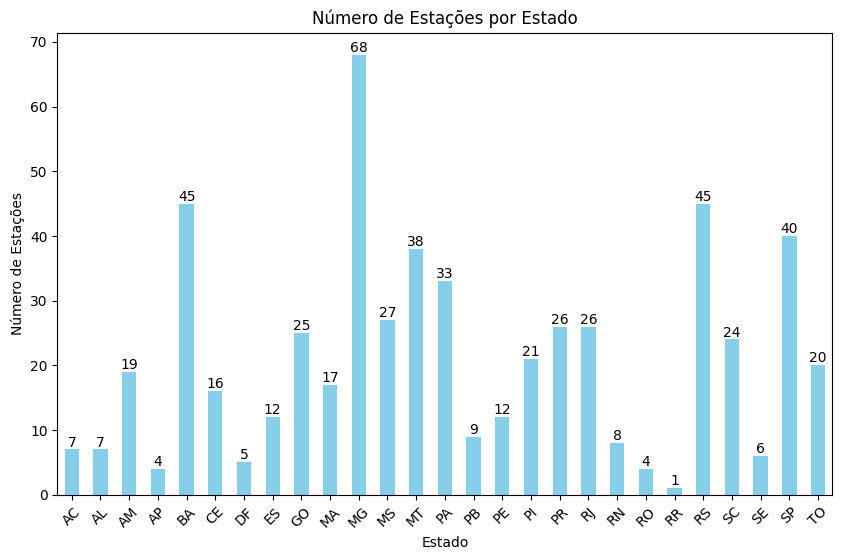

In [17]:
# Agrupando por estado e contando o número de estações
estacoes_por_estado = maindf1.groupby('SG_ESTADO').size()

# Criando o gráfico de barras para exibir a distribuição
fig, ax = plt.subplots(figsize=(10, 6))
bars = estacoes_por_estado.plot(kind='bar', ax=ax, color='skyblue')

# Adicionando o rótulos nas barras do gráfico
for bar in bars.containers:
    bars.bar_label(bar, label_type='edge')

# Configurando o título e os rótulos dos eixos
plt.title('Número de Estações por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Estações')
plt.xticks(rotation=45)
plt.show()

O gráfico acima nos responde as duas perguntas acima. Nos mostra um dados interessante, o estado que possui o maior número de estações meteorológicas é Minas Gerais, muito interessante essa informação, pois acreditava que o estado de São Paulo ser mais populoso e com o maior PIB concentraria o maior número de estações. Pelo contrário, ele fica atrás de Bahia e Rio Grande do Sul (ambas com 45 estações). Realizando uma pesquisa descobri que a combinação de fatores geográficos, históricos e socioeconômicos torna Minas Gerais um estado estratégico para a instalação de estações meteorológicas.

**7.4 - Qual a estação que está operante por mais tempo?**

In [18]:
# Convertendo a coluna DT_INICIO_OPERACAO para datetime
maindf1['DT_INICIO_OPERACAO'] = pd.to_datetime(maindf1['DT_INICIO_OPERACAO'])

# Identificando a estação com a data de início de operação mais antiga
estacao_mais_antiga = maindf1.loc[maindf1['DT_INICIO_OPERACAO'].idxmin()]

print(estacao_mais_antiga)

DC_NOME                          BRASILIA
SG_ESTADO                              DF
CD_SITUACAO                      Operante
VL_LATITUDE                    -15.789444
VL_LONGITUDE                   -47.925833
VL_ALTITUDE                       1160.96
DT_INICIO_OPERACAO    2000-05-06 00:00:00
CD_ESTACAO                           A001
Name: 75, dtype: object


A estação meteorológica mais antiga é a A001 que fica em Brasília - DF, a mesma teve início da operação de medição no dia 06/05/2000, ou seja, mais de 24 anos.

**7.5 - Quais as 5 estações que possuem a maior média de temperatura?**

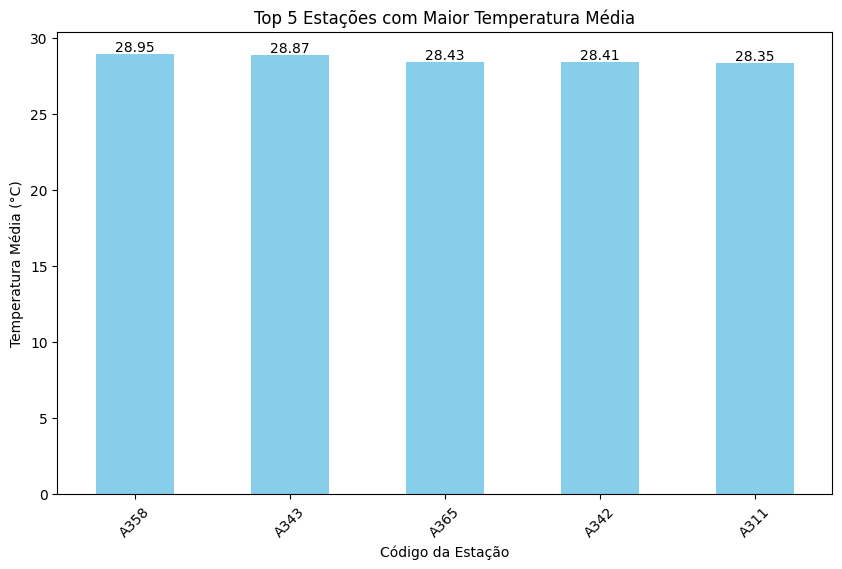

In [19]:
# Convertendo a coluna de temperatura média para o tipo numérica
maindf2['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'] = pd.to_numeric(maindf2['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'], errors='coerce')

# Agrupando por estação e calculando a temperatura média
grouped = maindf2.groupby('cod. estacao')['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean()

# Selecionando as 5 estações com a maior temperatura média
top_5_estacoes = grouped.nlargest(5)

# Criando o gráfico de barras para exibir o ranking
plt.figure(figsize=(10, 6))
bars = top_5_estacoes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Estações com Maior Temperatura Média')
plt.xlabel('Código da Estação')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(rotation=45)

# Adicionando os rótulos nas colunas do gráfico
for i, value in enumerate(top_5_estacoes):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

No resultado acima conseguimos identificar as 5 estações que possuem a maior média de temperatura baseado no dataset. Entretanto, o gráfico está exibindo apenas o código das estações, assim não conseguimos saber qual a cidade e estado da estação, no código abaixo vamos mesclar "merge" as duas tabelas maindf1 e maindf2 que possuem o código da estação em comum afim de obter a cidade e estado.

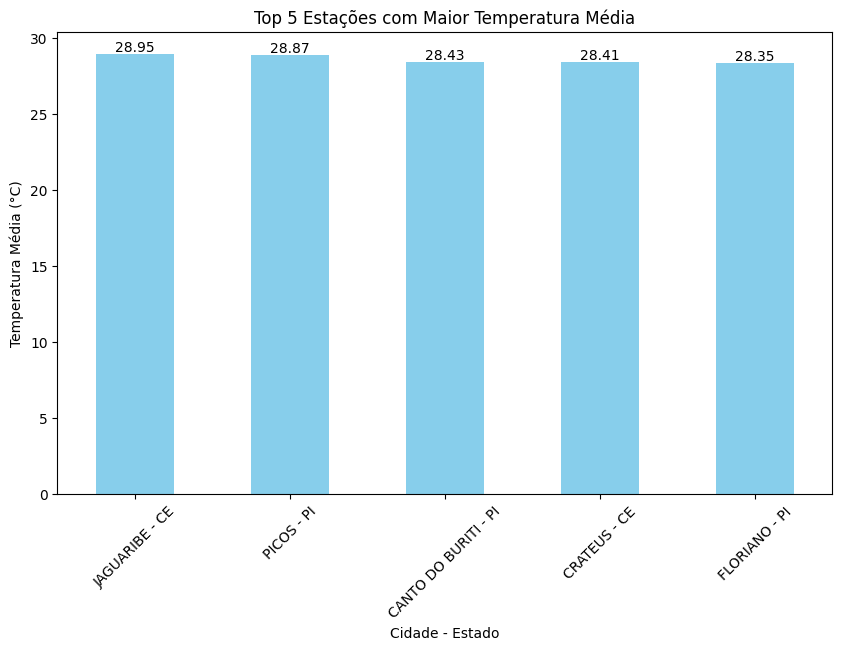

In [20]:
# Realizando o merge das tabelas com base no código da estação afim de obter a cidade da estação.
merged_df = pd.merge(maindf2, maindf1[['CD_ESTACAO', 'DC_NOME', 'SG_ESTADO']], left_on='cod. estacao', right_on='CD_ESTACAO', how='left')

# Criando uma nova coluna 'Cidade - Estado'
merged_df['Cidade - Estado'] = merged_df['DC_NOME'] + ' - ' + merged_df['SG_ESTADO']

# Agrupando por 'Cidade - Estado' e calculando a temperatura média
grouped = merged_df.groupby('Cidade - Estado')['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean()

# Selecionando as 5 estações com a maior temperatura média
top_5_estacoes = grouped.nlargest(5)

# Criando o gráfico de barras para exibir o ranking
plt.figure(figsize=(10, 6))
bars = top_5_estacoes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Estações com Maior Temperatura Média')
plt.xlabel('Cidade - Estado')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(rotation=45)

# Adicionando os rótulos nas colunas do gráfico
for i, value in enumerate(top_5_estacoes):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Gráfico exibindo as cinco estações e suas cidades e estados que possuem a maior média de temperatura. Das 5 cidades, 3 estão localizadas no estado do Piauí.

**7.6 - Quais as 5 estações que possuem a menor média de temperatura?**

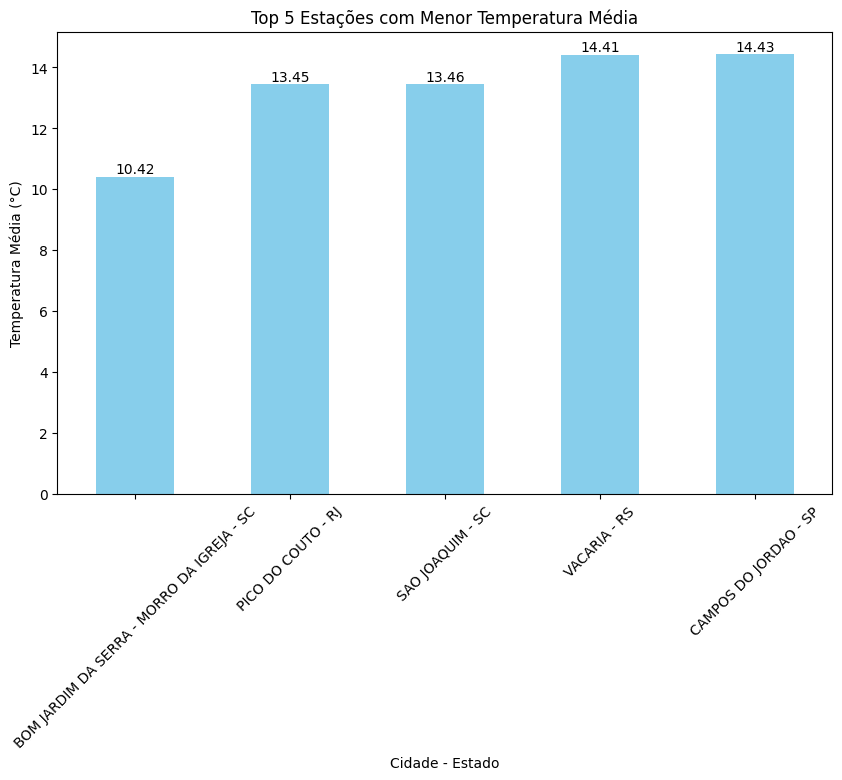

In [21]:
# Realizando o merge das tabelas com base no código da estação afim de obter a cidade da estação.
merged_df = pd.merge(maindf2, maindf1[['CD_ESTACAO', 'DC_NOME', 'SG_ESTADO']], left_on='cod. estacao', right_on='CD_ESTACAO', how='left')

# Criando uma nova coluna 'Cidade - Estado'
merged_df['Cidade - Estado'] = merged_df['DC_NOME'] + ' - ' + merged_df['SG_ESTADO']

# Agrupando por 'Cidade - Estado' e calculando a temperatura média
grouped = merged_df.groupby('Cidade - Estado')['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].mean()

# Selecionando as 5 estações com a menor temperatura média
top_5_estacoes = grouped.nsmallest(5)

# Criando o gráfico de barras para exibir o ranking
plt.figure(figsize=(10, 6))
bars = top_5_estacoes.plot(kind='bar', color='skyblue')
plt.title('Top 5 Estações com Menor Temperatura Média')
plt.xlabel('Cidade - Estado')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(rotation=45)

# Adicionando os rótulos nas colunas do gráfico
for i, value in enumerate(top_5_estacoes):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Gráfico exibindo as cinco estações e suas cidades e estados que possuem a menor média de temperatura. Das 5 cidades, 3 estão localizadas mais ao sul do Brasil.

**7.7 - Quais foram os 5 dias que registraram a maior precipitação em 24 horas?**

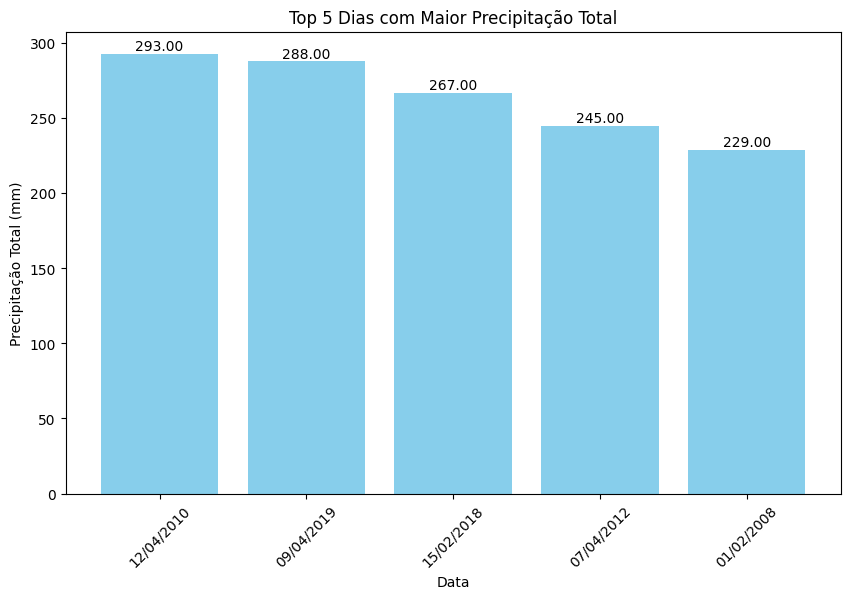

In [22]:
# Convertendo a coluna de precipitação para o tipo numérico, se necessário
maindf2['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'] = pd.to_numeric(maindf2['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'], errors='coerce')

# Removendo valores nulos
maindf2 = maindf2.dropna(subset=['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'])

# Selecionando os 5 dias com a maior precipitação total
top_5_dias = maindf2.nlargest(5, 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)')

# Criando o gráfico de barras para exibir os 5 dias com a maior precipitação total
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_dias['Data Medicao'], top_5_dias['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'], color='skyblue')
plt.title('Top 5 Dias com Maior Precipitação Total')
plt.xlabel('Data')
plt.ylabel('Precipitação Total (mm)')
plt.xticks(rotation=45)

# Adicionando os rótulos nas colunas do gráfico
for i, value in enumerate(top_5_dias['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Notamos que o gráfico acima demonstra que tivemos dias que choveram mais de 200mm em 24 horas. Em alguns locais essa quantidade de precipitação é esperada para todo o mês.

**7.8 - Quais as 5 cidades que tiveram a maior precipitação acumulada em 1 mês?**

<ipython-input-23-d8f6a9810a2e>:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  maindf2['Data Medicao'] = pd.to_datetime(maindf2['Data Medicao'])


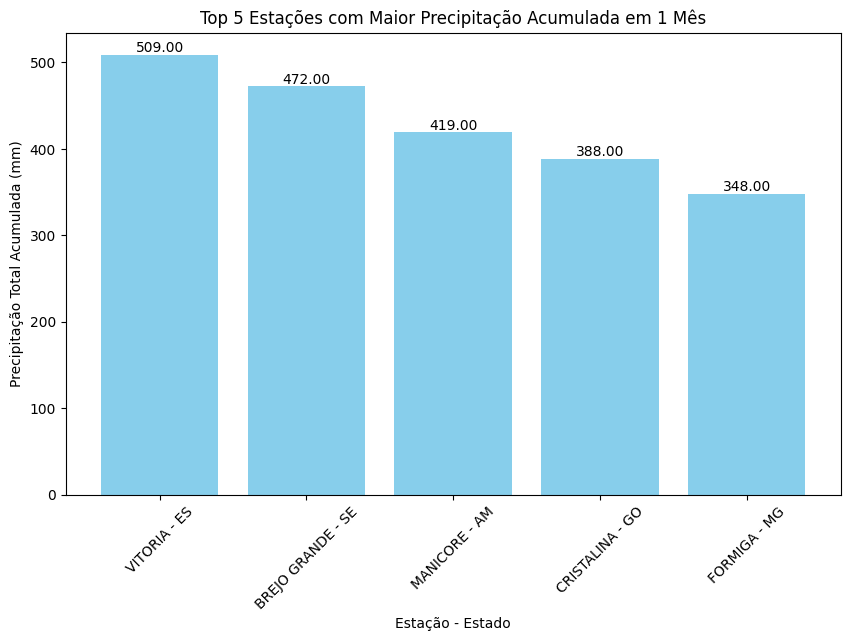

In [23]:
# Convertendo a coluna de precipitação para o tipo numérico, se necessário
maindf2['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'] = pd.to_numeric(maindf2['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'], errors='coerce')

# Removendo valores nulos
maindf2 = maindf2.dropna(subset=['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'])

# Convertendo a coluna de data para o tipo datetime
maindf2['Data Medicao'] = pd.to_datetime(maindf2['Data Medicao'])

# Criando uma coluna para o mês e ano
maindf2['AnoMes'] = maindf2['Data Medicao'].dt.to_period('M')

# Agrupando por estação e por mês/ano e calculando a precipitação total acumulada
precipitacao_acumulada = maindf2.groupby(['cod. estacao', 'AnoMes'])['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'].sum().reset_index()

# Selecionando as 5 estações com a maior precipitação total acumulada em qualquer período de 1 mês
top_5_estacoes = precipitacao_acumulada.nlargest(5, 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)')

# Combinando os dataframes para obter os nomes das estações e os estados
top_5_estacoes = top_5_estacoes.merge(maindf1, left_on='cod. estacao', right_on='CD_ESTACAO', how='left')

# Criando o gráfico de barras para exibir as 5 estações com a maior precipitação total acumulada
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_estacoes['DC_NOME'] + ' - ' + top_5_estacoes['SG_ESTADO'], top_5_estacoes['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'], color='skyblue')
plt.title('Top 5 Estações com Maior Precipitação Acumulada em 1 Mês')
plt.xlabel('Estação - Estado')
plt.ylabel('Precipitação Total Acumulada (mm)')
plt.xticks(rotation=45)

# Adicionando os rótulos nas colunas do gráfico
for i, value in enumerate(top_5_estacoes['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

O gráfico acima demonstra as 5 cidades que tiveram a maior precipitação em um período de 30 dias, com destaque para Vitória do Espírito Santo que choveu mais de 500mm em um mês.

## **8 - CONCLUSÃO**

Podemos concluir que a análise de dados acerca da utilização dos dataset's com as informações das estações meteorológicas do INMET foi satisfatória. A base de dados é consisa, encontramos problemas e resolvemos com a limpeza e tratamento dos dados, em alguns casos tivemos que mesclar as tabelas para obtenção das perguntas propostas no objetivo. Concluo que esse MVP foi muito importante e desafiador para mim e espero que tenha atingido os objetivos para obtenção da nota.  